### Analysis of the titanic dataset

#### Helper functions
Plotting functions to help us visualize the dataset.

In [25]:
def plotDistribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    fg = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    fg.map(sns.kdeplot, var, shade=True)
    fg.set(xlim=(0, df[var].max()))
    fg.add_legend()

#### Data collection routine
Collect train and test datasets. Combine both to have a 'full' dataset.

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

dfTrain = pd.read_csv('../input/train.csv')
dfTest  = pd.read_csv('../input/test.csv')
dfFull  = pd.concat([dfTrain, dfTest], ignore_index=True) 

dataset = dfTrain.as_matrix()

# Replacing 'Sex' column with 0,1 : 0 for male, 1 for female.
dfFull = dfFull.replace({"Sex":{'male':0,'female':1}})

dfFull.head()


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,0,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,1,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,1,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,1,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,0,0,0.0,373450


Drawing a correlation map among variables in the dataset.

In [ ]:
corr = dfFull.corr()
sns.heatmap(dfFull.corr(), xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True)


Notes: By glancing at the correlation map, survival is highly correlated with Sex, Pclass, Fare, Parch, Age in that order.

#### Data transformation
As part of transforming the data, we do the following.
* A new column by name 'Title' is added to the dataframe, which holds the titles of people extracted from their names.
* A new column for  holding family size variable is created, based on number of sibling/spouse and parent/children.
* Replacing NaN values in Age column by predicted age values, prediction being based on regression among title, fare, family size and embarkation.


In [19]:
# Extracting titles.
title = pd.DataFrame()
titles = dfFull['Name'].str.extract('(,)(.*?\.)',expand=True)[1]
cnt = 0
for t in titles:
    titles[cnt] = t.strip().strip('.')
    cnt += 1
title['Title'] = titles
#print(titles.unique())
    
# Creating new column to hold family size variable.
familySize = pd.DataFrame()
familySize['FamilySize'] = dfFull['SibSp'] + dfFull['Parch'] + 1

# Notice that we have some empty values in columns {Fare,Embarked}.
dfFull['Fare'].isnull().values.any()
dfFull['Embarked'].isnull().values.any()



True

#### Density plots
Following plots show the distribution of people who survived, with respect to a target attribute like Age.

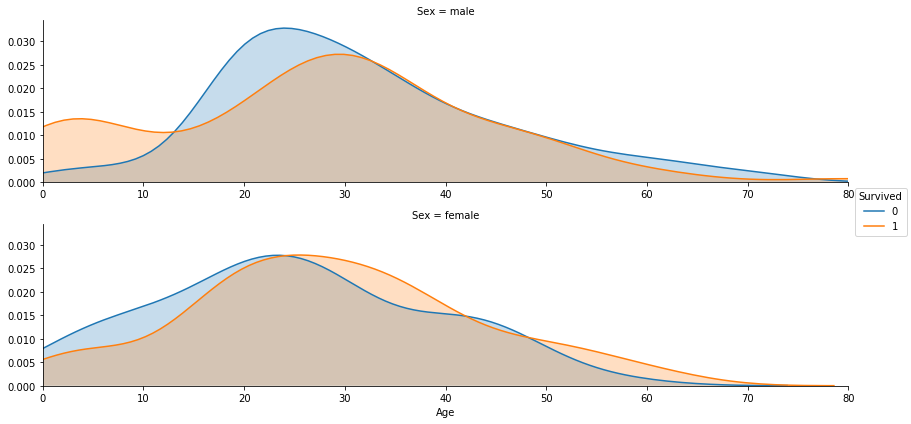

In [26]:
plotDistribution(dfTrain, var='Age', target='Survived', row='Sex')
